In [1]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-swing-on-strike.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

len(df)

84921

In [2]:
def calc_vibes(df, prefix):
    buoy = df[prefix + "_buoyancy"]# * df[prefix + "_mul"]
    press = df[prefix + "_pressurization"]# * df[prefix + "_mul"]
    cinn = df[prefix + "_cinnamon"]# * df[prefix + "_mul"]

    freq = 6 + (buoy * 10).round()
    phase = math.pi * ((2/freq) * dfc["day"] + 0.5)
    vibes = 0.5 * (press + cinn) * np.sin(phase) - (0.5 * press) + (0.5 * cinn)
    return vibes

def get_pitcher_mul(row):
    pm = str(row["pitcher_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in pm:
        mul += 0.2
    if "OVERPERFORMING" in ptm:
        mul += 0.2
    if "UNDERPERFORMING" in pm:
        mul -= 0.2
    if "UNDERPERFORMING" in ptm:
        mul -= 0.2
    if "TRAVELING" in ptm:
        pass # traveling just doesn't do anything on pitchers?
#         if not row["top_of_inning"]:
#             mul += 0.05
    if "HIGH_PRESSURE" in ptm:
        # i messed up baserunner_count lol, so it's a string
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "GROWTH" in ptm:
#         mul += min(0.05, 0.05 * (row["day"] / 99))
        pass # growth doesn't do anything on pitchers either
    if "SINKING_SHIP" in ptm:
        mul += (14 - row["pitching_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in ptm and row["weather"] == 11:
        mul += 0.5
    return mul

def get_batter_mul(row):
    bm = str(row["batter_mods"])
    btm = str(row["batting_team_mods"])
    ptm = str(row["pitching_team_mods"])
    mul = 1
    if "OVERPERFORMING" in bm:
        mul += 0.2
    if "OVERPERFORMING" in btm:
        mul += 0.2
    if "UNDERPERFORMING" in bm:
        mul -= 0.2
    if "UNDERPERFORMING" in btm:
        mul -= 0.2
    if "TRAVELING" in btm:
        if row["top_of_inning"]:
            # this doesn't seem to do anything if it's here or not here
            mul += 0.05
    if "GROWTH" in btm:
        mul += min(0.05, 0.05 * (row["day"] / 99))
#         pass
    if "HIGH_PRESSURE" in btm:
        if row["weather"] == 18 and str(row["baserunner_count"]) != "[]":
            mul += 0.25
    if "SINKING_SHIP" in btm:
        mul += (14 - row["batting_team_roster_size"]) * 0.01
    if "AFFINITY_FOR_CROWS" in btm and row["weather"] == 11:
        mul += 0.5
    if "CHUNKY" in bm:
        # todo: handle, in peanuts weather
        pass
    if "SMOOTH" in bm:
        # todo: handle, in peanuts weather
        pass
    if "ON_FIRE" in bm:
        # todo: handle
        pass
    return mul

In [3]:
df["batter_mul"] = df.apply(get_batter_mul, axis=1)
df["pitcher_mul"] = df.apply(get_pitcher_mul, axis=1)

In [4]:
# for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
#     df[attr] = df[attr] * df['batter_mul']
# for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
#     df[attr] = df[attr] * df['pitcher_mul']
# removed path and tragicness from this, because they're inverse attrs and need to be flipped first
for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_thwackability', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
    df[attr] = df[attr] * df['batter_mul']
for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_thwackability', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
    df[attr] = df[attr] * df['pitcher_mul']
    
df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"),"pitcher_vibes"] = 0
df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"),"batter_vibes"] = 0
    
df['pitcher_ruth_with_vibe'] = df['pitcher_ruthlessness'] * (1 + 0.2 * df['pitcher_vibes'])
df['batter_moxie_with_vibe'] = df['batter_moxie'] * (1 + 0.2 * df['batter_vibes'])
df['batter_musc_with_vibe'] = df['batter_musclitude'] * (1 + 0.2 * df['batter_vibes'])
df['batter_thwack_with_vibe'] = df['batter_thwackability'] * (1 + 0.2 * df['batter_vibes'])
df['batter_div_with_vibe'] = df['batter_divinity'] * (1 + 0.2 * df['batter_vibes'])

df['ruth_times_vibe'] = df['pitcher_ruthlessness'] * df['pitcher_vibes']
df['moxie_times_vibe'] = df['batter_moxie'] * df['batter_vibes']
df['path_times_vibe'] = df['batter_patheticism'] * df['batter_vibes']
df['thwack_times_vibe'] = df['batter_thwackability'] * df['batter_vibes']
df['musc_times_vibe'] = df['batter_musclitude'] * df['batter_vibes']
df['div_times_vibe'] = df['batter_divinity'] * df['batter_vibes']
df['filth_times_visc'] = df['ballpark_filthiness'] * df['ballpark_viscosity']



df['invpath'] = 1 - df['batter_patheticism']
df['invpath_mul'] = df['invpath']#  * df['batter_mul']
df['invpath_with_vibe'] = df['invpath_mul'] * (1 + 0.2 * df['batter_vibes'])
df['combined_batting'] = 0.25 * (df['batter_div_with_vibe'] +
                                 df['batter_musc_with_vibe'] +
                                 df['invpath_with_vibe'] +
                                 df['batter_thwack_with_vibe'])

# 'batter_div_with_vibe', 'batter_musc_with_vibe', 'invpath_with_vibe', 'batter_thwack_with_vibe',
#         'pitcher_ruth_with_vibe', 'ballpark_viscosity'


# df[df["pitcher_mul"] != 1][["pitcher_mul", "pitcher_mods", "pitching_team_mods"]].drop_duplicates()

In [5]:
dfc = df
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
# for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING", "CHUNKY", "SMOOTH"]:
for exclude_mod in ["O_NO", "ON_FIRE", "CHUNKY", "SMOOTH"]:
 dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.95]
# dfc = dfc[dfc['roll'] > 0.1]
# dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
# dfc = dfc[dfc['batter_patheticism'] > 0.1]

len(dfc)

76922

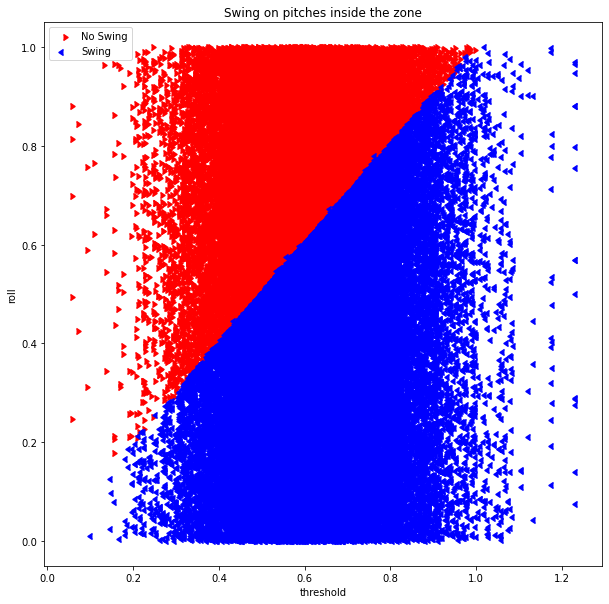

In [6]:
# dfc["threshold"] = -1*(\
#     intercept_scaled + \
#     coef_scaled[0,1] * dfc["combined_batting"] + \
#     coef_scaled[0,2] * dfc["pitcher_ruth_with_vibe"] + \
#     coef_scaled[0,3] * dfc["ballpark_viscosity"])


dfc["threshold"] = -1*(\
    -0.60 + \
    -0.35 * dfc["combined_batting"] + \
    0.40 * dfc["pitcher_ruth_with_vibe"] + \
    -0.20 * dfc["ballpark_viscosity"])

# [(1.0, 'roll'),
#  (0.3998948107488037, 'pitcher_ruth_with_vibe'),
#  (-0.3493653911192097, 'combined_batting'),
#  (-0.19858215226781548, 'ballpark_viscosity')]
# array([-0.6006551])


x_val = "threshold"
# x_val = "invpath_with_vibe"
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="No Swing", marker=CARETRIGHTBASE)
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Swing", marker=CARETLEFTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Swing on pitches inside the zone")
# ax.set_xlim(0.484, 0.499)

ax.legend()

24


,event_type,offset,roll,threshold,pitcher_mul,batter_mul,pitcher_ruth_with_vibe,invpath_with_vibe,ballpark_viscosity,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
34106,Foul,0.014384,0.574938,0.560554,1.01,1.450000,1.117651,0.433071,0.548732,Jesús Koch,Stevenson Heat,ALTERNATE,ALTERNATE;FRIEND_OF_CROWS,HIGH_PRESSURE;OVERPERFORMING,SINKING_SHIP,81,2c701ea0-fe1e-456a-bba2-395d8ad9f125,296
58403,BaseHit,0.012763,0.778347,0.765584,1.00,1.450000,0.722749,0.496134,0.486200,Ziwa Mueller,Adalberto Tosser,NaN,WILD;CREDIT_TO_THE_TEAM,HIGH_PRESSURE;OVERPERFORMING,CARCINIZATION;UNHOLEY,6,f8d89073-4a25-4fb2-b213-e46a30b014c6,271
63519,Out,0.009959,0.672470,0.662510,1.00,1.450000,1.005354,0.509970,0.486200,Ziwa Mueller,Henry Marshallow,NaN,NaN,HIGH_PRESSURE;OVERPERFORMING,AFFINITY_FOR_CROWS,10,a500fd55-dd0d-44ed-b122-688626e08c64,101
80982,Out,0.006995,0.545970,0.538975,1.00,1.200000,0.844014,0.187375,0.506666,Lowe Forbes,Jayden Wright,TRIPLE_THREAT,NaN,OVERPERFORMING;EARLBIRDS,BASE_INSTINCTS,22,b1ba5adf-2853-4edb-b991-8fb03a7212ec,122
73781,BaseHit,0.006887,0.444713,0.437825,1.00,1.200000,1.076084,0.485468,0.432771,Collins Melon,Emmett Tabby,ALTERNATE,NaN,OVERPERFORMING;EARLBIRDS,NaN,17,851339d3-3214-42b0-90c0-ad2bcf07dea8,109
73464,Out,0.006061,0.575273,0.569211,1.00,1.200000,1.076084,0.546287,0.432771,Steph Weeks,Emmett Tabby,FIRE_EATER,NaN,OVERPERFORMING;EARLBIRDS,NaN,17,851339d3-3214-42b0-90c0-ad2bcf07dea8,38
66925,Out,0.005698,0.552857,0.547159,1.00,1.200000,0.881530,0.510080,0.544272,Collins Melon,Mummy Melcon,ALTERNATE,NaN,OVERPERFORMING;EARLBIRDS,FIREPROOF;SEALANT;AMBUSH,12,33439f75-5d0d-484a-b4dd-1a84ac41a60b,185
58184,Out,0.004776,0.597056,0.592280,1.00,1.200000,0.679819,0.157733,0.583422,Lowe Forbes,Gerund Pantheocide,TRIPLE_THREAT,NaN,OVERPERFORMING;EARLBIRDS,NaN,6,5074499f-ee45-43ec-94ce-804b772f0d23,224
75394,Foul,0.004688,0.772117,0.767429,1.00,1.200000,0.968879,0.730472,0.481398,Baby Doyle,Cell Barajas,PERK,NaN,OVERPERFORMING;EARLBIRDS,NaN,18,628b899b-e08d-434a-81df-0146cb0c7ba6,153
82624,Foul,0.004064,0.750405,0.746341,1.00,1.200000,0.697376,0.565249,0.506666,Steph Weeks,Lars Taylor,FIRE_EATER,SWIM_BLADDER,OVERPERFORMING;EARLBIRDS,BASE_INSTINCTS,23,2e014d84-4421-4180-b8e3-ed8eef6f35ce,152


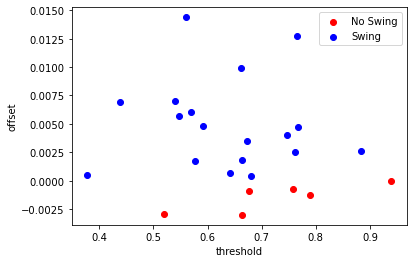

In [7]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "threshold"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="No Swing")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Swing")
ax.set_xlabel(x_val)
ax.set_ylabel('offset')
ax.legend()

table = outliers
print(len(table))
table = table[["event_type", "offset", #"home_score", "away_score", "top_of_inning", "inning",
       "roll", "threshold", "pitcher_mul", "batter_mul", #"baserunner_count", 
#        "batter_vibes", "pitcher_vibes",
       "pitcher_ruth_with_vibe", "invpath_with_vibe", "ballpark_viscosity", # "batter_musclitude", "batter_divinity", "batter_thwackability", "batter_patheticism",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset', ascending=False)
# len(table)
# print(table['offset']/table['threshold'])
table

In [8]:
# X = dfc[['roll', 'passed',
#         'batter_div_with_vibe', 'batter_musc_with_vibe', 'batter_patheticism', 'batter_thwack_with_vibe',
#         'pitcher_ruth_with_vibe', 'ballpark_viscosity']]
# X = dfc[['roll', 'passed',
#         'batter_div_with_vibe', 'batter_musc_with_vibe', 'invpath_with_vibe', 'batter_thwack_with_vibe',
#         'pitcher_ruth_with_vibe', 'ballpark_viscosity']]
X = dfc[['roll', 'passed',
        'combined_batting',
        'pitcher_ruth_with_vibe', 'ballpark_viscosity']]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X['passed']
X = X.drop('passed', axis=1)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=1000).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))

[[29554    27]
 [   18 47323]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     29581
        True       1.00      1.00      1.00     47341

    accuracy                           1.00     76922
   macro avg       1.00      1.00      1.00     76922
weighted avg       1.00      1.00      1.00     76922



In [10]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (0.40016811329163865, 'pitcher_ruth_with_vibe'),
 (-0.3504828887091787, 'combined_batting'),
 (-0.20039354606442136, 'ballpark_viscosity')]

In [11]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.59978027])

In [12]:
list(df.columns)

['Unnamed: 0',
 'event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'pitcher_buoyancy',
 'pitcher_divinity',
 'pitcher_martyrdom',
 'pitcher_moxie',
 'pitcher_musclitude',
 'pitcher_patheticism',
 'pitcher_thwackability',
 'pitcher_tragicness',
 'pitcher_ruthlessness',
 'pitcher_overpowerment',
 'pitcher_unthwackability',
 'pitcher_shakespearianism',
 'pitcher_suppression',
 'pitcher_coldn